# Responsible data practices applied to machine learning

### [Original Notebook](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb) by [Randal S. Olson](http://www.randalolson.com/) and Supported by [Jason H. Moore](http://www.epistasis.org/)
### Modified by Jonathan Rotner of [The MITRE Corporation](http://www.mitre.org/)


## Table of contents

1. [Introduction](#Introduction)

2. [License](#License)

3. [Required libraries](#Required-libraries)

4. [Why are we creating a notebook on responsible data practices?](#Why-are-we-creating-a-notebook-on-responsible-data-practices?)

5. [This project's problem domain](#This-project's-problem-domain)

6. [Step 1: Define the question or problem we're looking to solve](#Step-1:-Define-the-question-or-problem-we're-looking-to-solve)

7. [Step 2: Checking the data](#Step-2:-Checking-the-data)

8. [Step 3: Tidying the data](#Step-3:-Tidying-the-data)

9. [Step 4: Exploratory analysis](#Step-4:-Exploratory-analysis)

10. [Step 5: Reproducibility](#Step-5:-Reproducibility)

11. [Conclusions](#Conclusions)

12. [Contacting the Authors](#Contacting-the-Authors)

13. [Further reading](#Further-reading)

14. [Acknowledgements](#Acknowledgements)

15. [Answers to homework questions](#Answers-to-homework-questions)

## Introduction

[[ go back to the top ]](#Table-of-contents)

In the time it took you to read this sentence, terabytes of data have been collectively generated across the world — more data than any of us could ever hope to process, much less make sense of, on the machines we're using to read this notebook.

In response to this massive influx of data, the field of Data Science has come to the forefront in the past decade. Cobbled together by people from a diverse array of fields — statistics, physics, computer science, design, and many more — the field of Data Science represents our collective desire to understand and harness the abundance of data around us to build a better world.

In this notebook, we will go over a data analysis pipeline in Python to demonstrate what a typical data science workflow looks like.

In addition to providing code examples, we hope to imbue responsible data practices so you can be a more effective — and more collaborative — data scientist.

The lesson follows along with the data analysis checklist from [The Elements of Data Analytic Style](https://leanpub.com/datastyle), which is a great (and free) guidebook to performing outstanding data analysis.

## License

[[ go back to the top ]](#Table-of-contents)

**This notebook is intended to be a public resource. As such, if you see any glaring inaccuracies or if a critical topic is missing, please feel free to point it out or (preferably) submit a pull request to improve the notebook.**

Please see the original [repository README file](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. In general, I (Randy) have licensed this material so that it is as widely usable and shareable as possible.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **seaborn**: Advanced statistical plotting library.

## Why are we creating a notebook on responsible data practices?

[[ go back to the top ]](#Table-of-contents)
    
The output of AI & Machine Learning algorithms reflect the patterns in the data they are fed. Because machines can weigh a lot more connections than we can hold in our heads, this can lead to good insights that we humans couldn't comprehend. But that lack of comprehension (the 'black box' part of AI), can also mean we have to be extra careful about what we data feed in to the machine, which is how it trains. We have to take steps to ensure that the outcomes of our AI programs do not perpetuate or amplify decisions that impact our lives. A good guideline to follow is, our training data must be relevant and representative of our real world environment. Or, "what we put in is what we'll get out."

What do we mean by this maxim? We're about to create a machine learning program that classifies 3 different categories of Irises.  Hopefully you don't need much convincing that we wouldn't train a machine on Iris data in order to classify different types of Orchids. Less obvious perhaps, is that we wouldn't want to train a machine with data of European Irises to classify North American or Asian Irises. A last consideration, we wouldn't want to train a machine on data from a single camera, with a single lens and zoom, or with a uniform set of lighting conditions if our consumers aren't going to recreate those conditions. Any of these limitations to the training data would decrease our accuracy and have unintended effects once our product is made available.

The data we use to train must be relevant and representative of the demographics that the algorithm will be deployed. This data context is much harder to appreciate and quantify when AI is applied to social domains. Such adverse impact, intentional or unintentional, could be as explicit as [an algorithm deciding which neighborhoods to police](https://centerformediajustice.org/wp-content/uploads/2016/08/Upturn_-_Stuck_In_a_Pattern_v.1.01.pdf) or an algorithm [perpetuating discriminatory housing practices](https://www.newamerica.org/public-interest-technology/blog/history-us-housing-segregation-points-devastating-consequences-algorithmic-bias/) to effects more implicit such as Amazon employing a [hiring algorithm that showed preference to male candidates](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G) or Google and Bing search queries that [tied positive and negative attributes to different demographics](https://foreignpolicy.com/2017/01/16/women-vs-the-machine/).  The downsides of AI systems [disproportionately affect groups](https://cyberlaw.stanford.edu/publications/there-blind-spot-ai-research) that are already disadvantaged by factors such as race, gender, and socioeconomic background.

Now that we're all the wiser, we can combat these effects by examining the data fed into the algorithms, and asking if those criteria and assumptions will hold true when the algorithm is implemented in real world environments. 
    
Our questions will cover two sets of effects:
>1. Is our dataset inaccurate, partial, or systematically problematic?

> 2. Is the [context of the dataset](https://www.thenewatlantis.com/publications/why-data-is-never-raw) — why it was collected, how it was collected, and how it was tidied or cleaned up — relevant and representative of our real world deployment?

Finally, all the assumptions and choices we make, we should make explicit and transparent, so that our work can be peer reviewed, reproduced, and validated.

## This project's problem domain

[[ go back to the top ]](#Table-of-contents)

For the purposes of this exercise, let's pretend we're working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

<img src="../images/petal_sepal.jpg" />

We've been given a [data set](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/raw/master/example-data-science-notebook/iris-data.csv) from our field researchers to develop the demo, which only includes measurements for three types of *Iris* flowers:

### *Iris setosa*

<img src="../images/iris_setosa.jpg" />

### *Iris versicolor*
<img src="../images/iris_versicolor.jpg" />

### *Iris virginica*
<img src="../images/iris_virginica.jpg" />

The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.

**Note:** The data set we're working with is the famous (in data science circles) [*Iris* data set](https://archive.ics.uci.edu/ml/datasets/Iris) — which the original author has modified slightly for demonstration purposes of this lesson. A copy of the dataset is found locally, in the /data/external/ folder.

## Step 1: Define the question or problem we're looking to solve

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to classify the species (i.e., class) of the flower based on four measurements that we're provided: sepal length, sepal width, petal length, and petal width.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified flowers — to quantify how well our model is performing. Our company's Head of Data has told us that we should achieve at least 90% accuracy.

What other metrics for success do you think would be relevant? 
Some ideas we thought of: instead of 90% accuracy averaged over all classes, what about a minimum 90% accuracy for each class of Iris? Or if false positive and false negative rates are equal across all classes. There are [many ways to think about accuracy](http://www.fairness-measures.org/Pages/Classification), and each metric can have a different objective and result in different algorithmic behaviors.

>Did you understand the context for the question and the scientific or business application?

We're building part of a data analysis pipeline for a smartphone app that will be able to classify the species of flowers from pictures taken on the smartphone. In the future, this pipeline will be connected to another pipeline that automatically measures from pictures the traits we're using to perform this classification.

>Did you record the experimental design?

Our company's Head of Data has told us that the field researchers are hand-measuring 50 randomly-sampled flowers of each species using a standardized methodology. The field researchers take pictures of each flower they sample from pre-defined angles so the measurements and species can be confirmed by the other field researchers at a later point. At the end of each day, the data is compiled and stored on a private company GitHub repository.

>Did you consider whether the question could be answered with the available data?

The data set we currently have is only for three types of *Iris* flowers. The model built off of this data set will only work for those *Iris* flowers, so we will need more data to create a general flower classifier.

<hr />

Notice that we've spent a fair amount of time working on the problem without writing a line of code or even looking at the data.

**Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.** Don't skip it.

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

The next step is to look at the data we're working with. Even curated data sets from the government or companies can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks or outliers with the data?
* Do I need to fix or remove any of the data?

We are looking to capture and make explicit our assumptions so that other researchers can validate our work and so that users of the app can understand the limitations we have imposed. This practice will reduce the 'black box' effect of Machine Learning and increase our understanding of what's going on under the hood from *both* a human and machine perspective.

<hr />

Let's start by reading the data into a [pandas DataFrame](https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm), which is a two-dimensional data structure (like a spreadsheet) whose size can change and can hold data of different types (e.g., numbers, text...).

Commenting the code is always helpful to others who have to read your code, or to yourself when you forget what you were trying to do. At least in the beginning, we've included extensive comments to help non-programmers understand what is going on. 

In [117]:
#A good coding convention is to break up a large, unwieldy programming task into 
#separate, smaller, more manageable subtasks or modules.
#Standalone modules are called packages

#To use any package in your code, you must first make it accessible. You have to import it. 
#This line imports the 'pandas' package (see Required Libraries section of this notebook) 
#And after importing, renames it 'pd'
import pandas as pd

#read_csv reads in the csv file in quotes, and stores the information in the variable 'iris_data'
iris_data = pd.read_csv('../data/external/iris-data.csv')
#The 'head' function returns the first several rows in the DataFrame
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We're in luck! The data seems to be in a structured format that pandas can parse.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. The headers even give us the units that the measurements were recorded in, just in case we needed to know at a later point in the project.

Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.

**Notice that all setosa Irises are listed first, and the data is not randomly listed. We'll come back to this later.**

Let's explore the data a little further. It's always a good idea to look at the distribution of our data — especially the outliers. Let's start by printing out some summary statistics about the data set.

In [118]:
#Generate descriptive statistics that summarize the dataset’s distribution, excluding NaN values
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see several useful values from this table. For example, we see that five `petal_width_cm` entries are missing.

Why might that be?
The data might be missing. Thankfully, the field researchers already told us that they put a 'NA' into the spreadsheet when they were missing a measurement.

We can tell pandas to automatically identify missing values if it knows our missing value marker.

In [119]:
iris_data = pd.read_csv('../data/external/iris-data.csv', na_values=['NA'])

Voilà! Now pandas knows to treat rows with 'NA' as missing values.

Coding homework A (intermediate): What does the *na_values* field do by default?

Answer (double click to type in here):

Check your answer with the one provided at the [bottom of the page](#Answers-to-homework-questions)

Tables aren't always useful unless we know that our data should fall in a particular range. It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

OK, how do we want to visualize the data?  There's a [handy resource](https://www.data-to-viz.com/) that helps us decide what's a good visualization source (and it's a visualization itself!). Clicking on that link, we have numerical and categorical information - so go to that tab. We have 3 categories (3 types of Irises) with a single observation, or value, for each measurement. So a scatterplot (more specifically, a grouped scatterplot) is a good choice.

Coding homework B (intermediate): Now that we've picked a scatterplot, what Python library will help us plot in this notebook?
<br>Hint: There are many packages that might be useful here. Go back to the [handy resource](https://www.data-to-viz.com/) and see what you can discover.

Answer:

Check your answer with the one provided at the [bottom of the page](#Answers-to-homework-questions)

Let's set up the notebook so we can plot inside of it.

In [120]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

So, let's create a **scatterplot matrix,** which does both scatterplots and histograms. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.

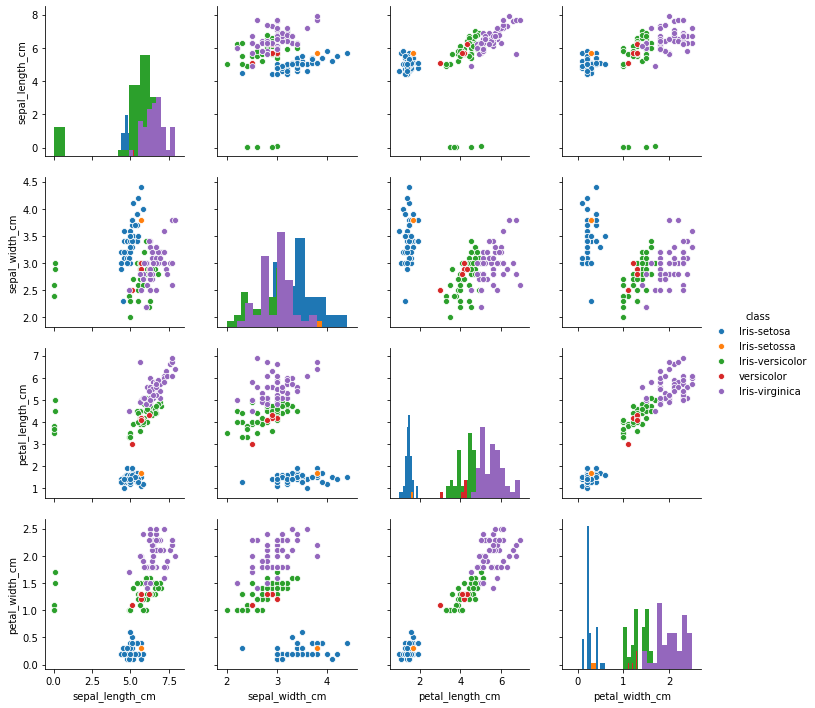

In [121]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
# Here, we use the dropna() function, as a more direct alternate to the code above
sb.pairplot(iris_data, hue = 'class', diag_kind='hist', dropna = True);

From the scatterplot matrix, we can already see some issues with the data set.

Analysis homework C: list 2 issues you see in the data set. 

Answer:

Check your answer with the one provided at the [bottom of the page](#Answers-to-homework-questions). In all of these cases, we need to figure out what to do with the erroneous data. Which takes us to the next step...

## Step 3: Tidying the data

[[ go back to the top ]](#Table-of-contents)

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one.

>There are five classes when there should only be three, meaning there were some coding errors.

After talking with the field researchers, it sounds like one of them forgot to add `Iris-` before their `Iris-versicolor` entries. The other extraneous class, `Iris-setossa`, was simply a typo that they forgot to fix.

Let's use the DataFrame to fix these errors.

In [122]:
#store a copy of the original data before we make changes.
iris_data_orig = iris_data

#the .loc function accesses all the data whose class is 'versicolor' and changes that class to 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
#the .loc function accesses all the data whose class is 'Iris-setossa' and changes that class to 'Iris-setosa'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

#returns unique classes of our data
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Much better! Now we only have three class types. 

>There are some clear outliers in the measurements that *may* be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

Fixing outliers can be tricky business. It's rarely clear whether the outlier was caused by measurement error, recording the data in improper units, or if the outlier is a real anomaly. For that reason, we should be judicious when working with outliers: if we decide to exclude any data, we need to make sure to document what data we excluded and provide solid reasoning for excluding that data. (i.e., "This data didn't fit my hypothesis" will not stand peer review.)

In the case of the one anomalous entry for `Iris-setosa`, let's say our field researchers know that it's impossible for `Iris-setosa` to have a sepal width below 2.5 cm. Clearly this entry was made in error, so let's scrap it.

First, let's confirm there's only one entry that meets this criteria.

In [123]:
#Return any data of 'Iris-setosa' class with a 'sepal_width_cm' < 2.5 cm
iris_data.loc[(iris_data['class'] == 'Iris-setosa') & (iris_data['sepal_width_cm'] < 2.5)]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.5,2.3,1.3,0.3,Iris-setosa


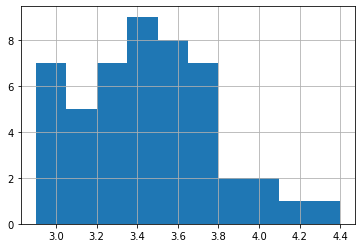

In [124]:
# This line drops any 'Iris-setosa' rows with a sepal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
#plot the results
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist();

Coding homework D (beginners): What is happening in the first .loc statement above?
<br> Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

Answer:

Check your answer with the one provided at the [bottom of the page](#Answers-to-homework-questions)

Excellent! Now all of our `Iris-setosa` rows have a sepal width greater than 2.5. Let's verify it.

<br>Coding homework E (beginner, intermediate, and advanced): Check how many entries were removed. It should only be one. 

Did you type in your answer in the coding box above?

>Continuing with this issue, we need to address is the several near-zero sepal lengths for the `Iris-versicolor` rows. 

Let's take a look at those rows.


In [125]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


How about that? All of these near-zero `sepal_length_cm` entries seem to be off by two orders of magnitude, as if they had been recorded in meters instead of centimeters.

After some brief correspondence with the field researchers, we find that one of them forgot to convert those measurements to centimeters. Let's do that for them.

Analysis homework F: What would you do if you couldn't contact the researchers?

Answer:

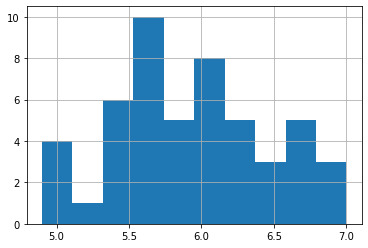

In [126]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0;

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist();

Phew! Good thing we fixed those outliers. They could've really thrown our analysis off.

>For the third issue: we had to drop those rows with missing values.

Let's take a look at the rows with missing values:

In [127]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


It's not ideal that we had to drop those rows, especially considering they're all `Iris-setosa` entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same *Iris* type — maybe there's a way to fix it.

One way to deal with missing data is **mean imputation**: If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

Let's see if we can do that here.

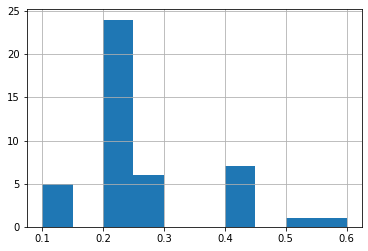

In [128]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist();

Most of the petal widths for `Iris-setosa` fall within the 0.2-0.3 range, so let's replace the Null values in these entries with the average measured petal width.

In [129]:
#let's make a copy of the data before we change these values
iris_data_imputed = iris_data

#calculate the average petal width for class 'Iris-setosa'
average_petal_width = iris_data_imputed.loc[iris_data_imputed['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

#replace Iris-setosa, petal_width, null entries with average width
iris_data_imputed.loc[(iris_data_imputed['class'] == 'Iris-setosa') &
              (iris_data_imputed['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width
#Show what we did
iris_data_imputed.loc[(iris_data_imputed['class'] == 'Iris-setosa') &
              (iris_data_imputed['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


Coding homework G (intermediate): Check to see if any null entries are left. Use the code cell below:

Now we've recovered those rows and no longer have missing data in our data set.

<br> Analysis Homework H: what are the risks and benefits for mean imputation vs leaving the data as is?

Answer:

**Note: Inputting our own data is not a standard practice and introduces erros and bias into your analysis. If you choose to do so, make it explicit. If you see coding examples that do it, be sure to find out why.**

**If instead you decide to use the original data , you can drop all rows with missing data with the `dropna()` call:**

In [130]:
# Let's return to iris_data DataFrame, and not the iris_data_imputed DataFrame
# and drop the na values
iris_data.dropna();

<hr />
After all this hard work, we don't want to repeat this process every time we work with the data set. Let's save the tidied data file *as a separate csv file* and work directly with that data file from now on.

In [131]:
#index=False means don't write row names to the file
iris_data.to_csv('../data/processed/iris-data-clean.csv', index=False)

#read in clean data to new variable
iris_data_clean = pd.read_csv('../data/processed/iris-data-clean.csv')

Now, let's take a look at the scatterplot matrix now that we've tidied the data.

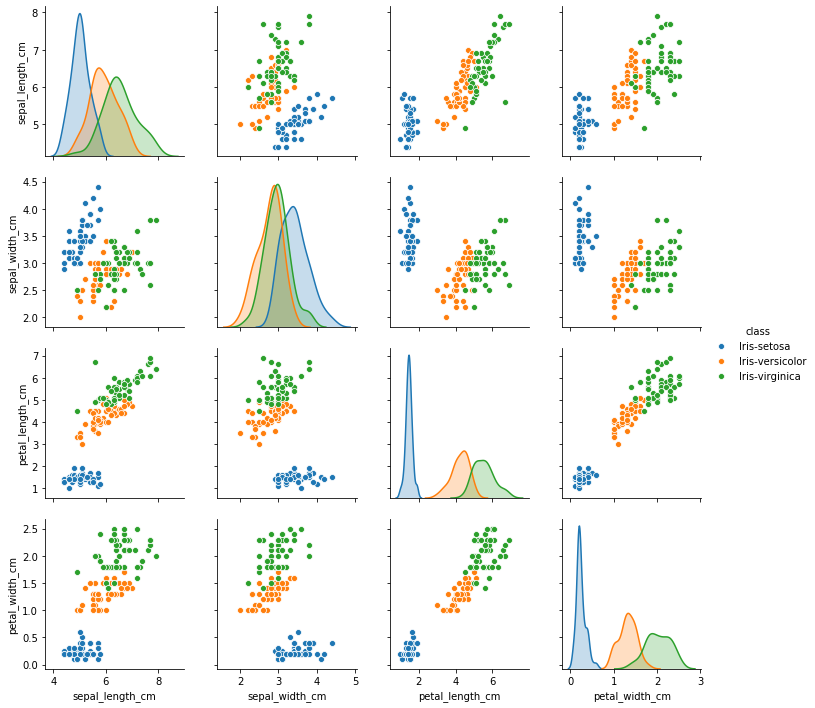

In [132]:
sb.pairplot(iris_data_clean, hue='class');

The general takeaways here should be:

* Make sure your data is encoded properly

* Use domain knowledge whenever possible to validate data that seems to not belong

* Deal with missing data (and use code to verify that your tidying resulted in what you intended)

* Don't tidy your data manually (instead use code), because that is not easily reproducible

* Plot everything you can about the data at this stage of the analysis so you can *visually* confirm everything looks correct

* Record how you tidied your data and what assumptions you made

Analysis Homework I: what should we record about how we tidied our data?

Answer:

## Step 4: Exploratory analysis

[[ go back to the top ]](#Table-of-contents)

Now after spending time tidying our data, we can start analyzing it!

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

* How is my data distributed?

* Are there any correlations in my data?

* Are there any confounding factors that explain these correlations?

* Did you attempt a log scale?

This is the stage where we plot all the data. Create many charts, but don't bother making them pretty — these charts are for internal use.

We want to see if we can learn enough to come up a gut check. Can we think about what the answer should look like? Can we think about what the answer definitely should *not* look like? Then we can compare our gut check to the machine's output later on.

Let's return to that scatterplot matrix that we used earlier.

Our data is normally distributed for the most part, which is great news if we plan on using any modeling methods that assume the data is normally distributed.

There's something strange going on with the petal measurements. Maybe it's something to do with the different `Iris` types. Let's color code the data by the class again to see if that clears things up.

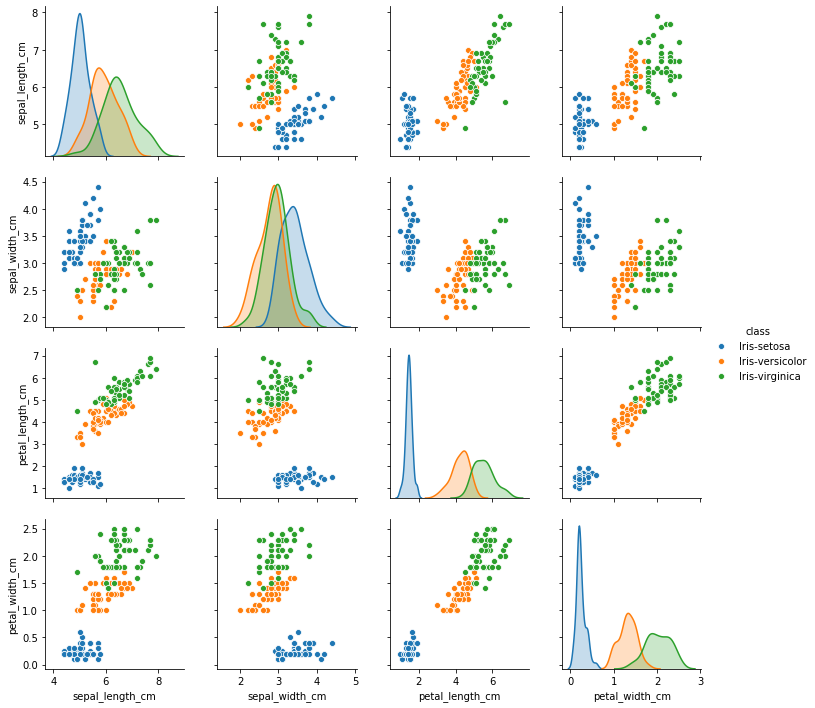

In [133]:
sb.pairplot(iris_data_clean, hue='class');

Sure enough, the strange distribution of the petal measurements exist because of the different species. This is actually great news for our classification task since it means that the petal measurements will make it easy to distinguish between `Iris-setosa` and the other `Iris` types.

Distinguishing `Iris-versicolor` and `Iris-virginica` will prove more difficult given how much their measurements overlap.

Analysis Homework J: stop and consider what individual characteristics we expect will be accurate classifiers.
<br> Hint: look at the histograms.

Answer:

Analysis Homework K: what correlations do you think will be helpful for classification?
<br> Hint: look at the scatterplots.

Answer:

We can also make [violin plots](https://www.data-to-viz.com/graph/violin.html) of the data to compare the measurement distributions of the classes. Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

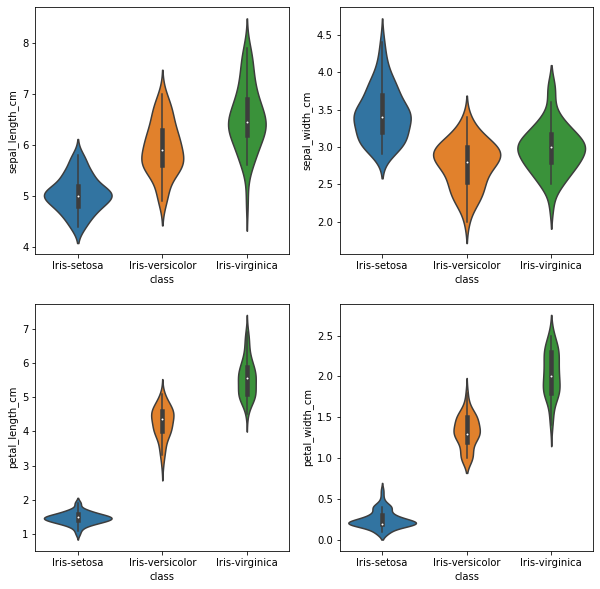

In [134]:
#set the size of the plot
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    #make multiple plots in the same window: 2x2 grid
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

Coding Homework L (intermediate): Can you write other lines of code to decipher what is happening in the for loop above? Use the cells below.

Analysis Homework M: List 3 things that these plots tell us.

Answer:

<hr />
The last exploratory question posed is about using log plots. Log plots are often useful for visualizing relationships in [certain kinds of data](https://stats.stackexchange.com/questions/27951/when-are-log-scales-appropriate). Log plots help us view:
* a large range without small values being compressed down into bottom of the graph
* rates of change over time
* circumstances where the data are more naturally expressed geometrically

Since none of those criteria apply here, we don't need to explore log plots further.

## Step 5: Reproducibility

[[ go back to the top ]](#Table-of-contents)

Ensuring that our work is reproducible is the last and important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced**. As such, if our analysis isn't reproducible, we might as well not have done it.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.

Beyond recording what we did, we should also document what software and hardware we used to perform our analysis. This typically goes at the top of our notebooks so our readers know what tools to use.

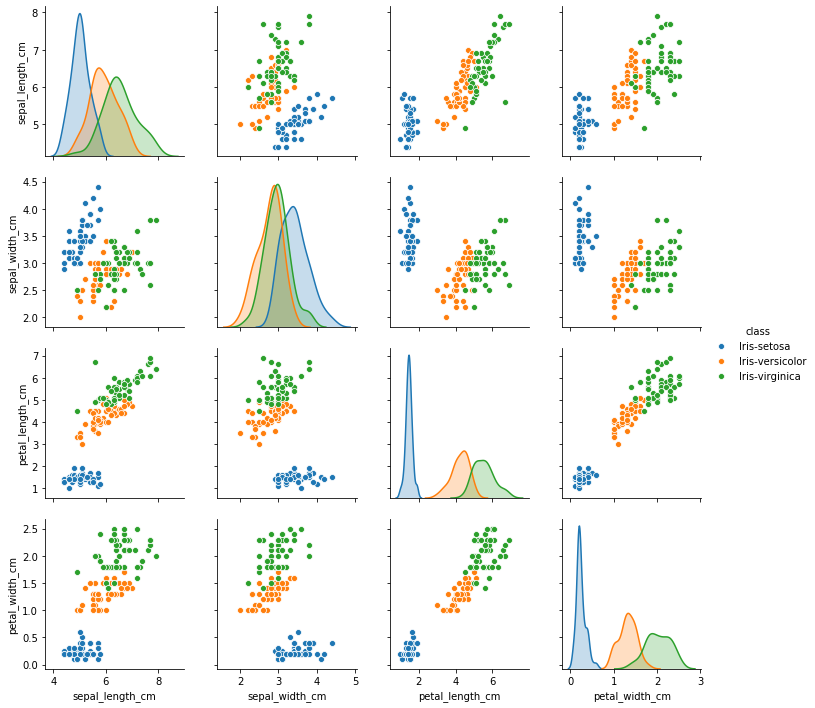

In [135]:
sb.pairplot(iris_data, dropna = True, hue = 'class');

Finally, let's extract the core of our work from Steps 1-4 and turn it into a single pipeline.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


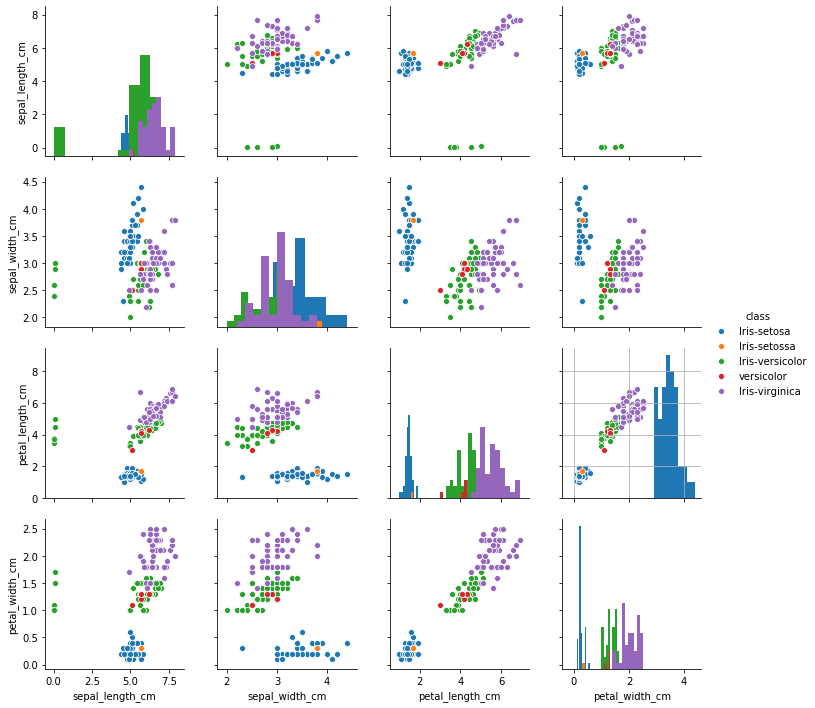

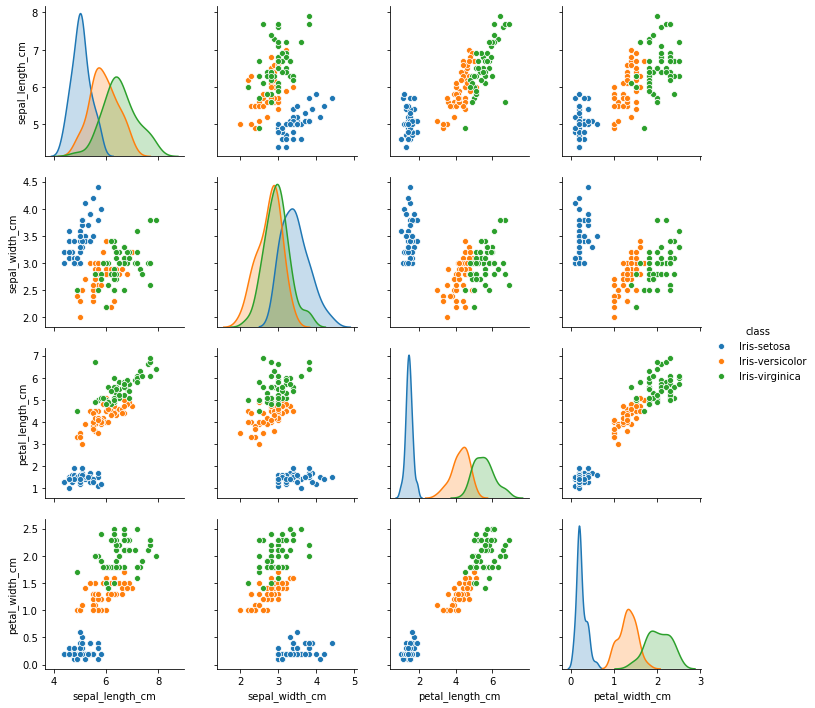

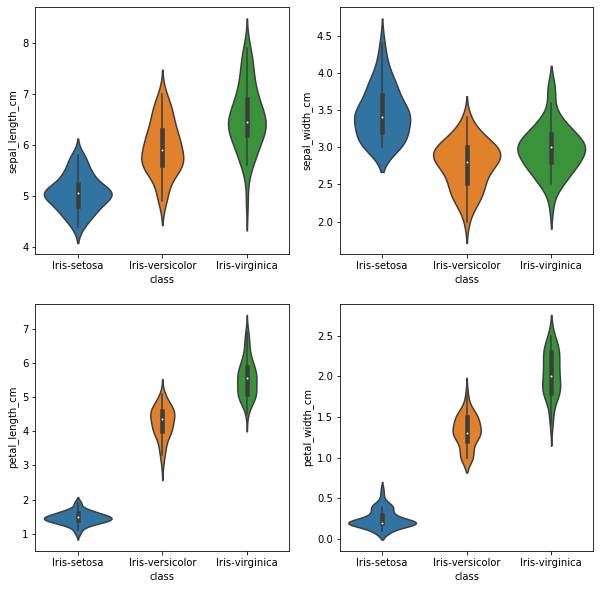

In [136]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline
#The next lines import the packages we need (see Required Libraries section of this notebook)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#read_csv reads in the csv file in quotes, and stores the information in the variable 'iris_data'
iris_data = pd.read_csv('../data/external/iris-data.csv')

#store a copy of the original data before we make changes.
iris_data_orig = iris_data

# temporarily drop the rows with 'NA' values so seaborn can plot them
sb.pairplot(iris_data, hue='class', diag_kind='hist', dropna = True);

#the .loc function access all the data whose class is 'versicolor' and changes that class to 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
#the .loc function access all the data whose class is 'Iris-setossa' and changes that class to 'Iris-setosa'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

# This line drops any 'Iris-setosa' rows with a sepal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
#plot the results
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist();

# After some brief correspondence with the field researchers, we find that one of them forgot to convert 
# several Iris-versicolor measurements to centimeters
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0;

# Let's return to iris_data DataFrame, and not the iris_data_imputed DataFrame
# and drop the na values
iris_data.dropna(inplace=True);

#write what we did to a CSV file
#index=False means don't write row names to the file
iris_data.to_csv('../data/processed/iris-data-clean.csv', index=False)

#read in clean data to new variable
iris_data_clean = pd.read_csv('../data/processed/iris-data-clean.csv')

sb.pairplot(iris_data_clean, hue='class');

#do violin plots
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    #make multiple plots in the same window: 2x2 grid
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean);


## Conclusions

[[ go back to the top ]](#Table-of-contents)


I hope you've seen that good outcomes come from taking time to understand the objective of your project, checking the context of how the data was collected, and tidying and exploring your data is a necessary step to getting accurate outcomes.  **Good data leads to good models.**  

We covered a couple lessons in this notebook, including:
1. *Define the question or problem we're looking to solve.*
<br>We asked many questions about our goal, metrics for success, understanding the application and context for the product, recording experimental design, and whether we could solve our problem with the available data.


2. *Check the data*
<br>We investigated if there were issues with the data, if there were outliers, and why that might be. We also discussed different ways to visualize our data.


3. *Tidying the data*
<br>We thought about different ways we might fix or remove data. We went over some of the risks in changing data, and the importance of outlining our assumptions and our decisions.


4. *Exploratory Analysis*
<br>We used our brains to consider what patterns in the data might exist, and build a gut check to compare against the machine's output.


5. *Good coding practices*
<br>We learned that commenting is an important practice for yourself and for others. We noted that manually changing data leads to mistakes. Last, we saw that we should verify that our code did what we hoped it would.


6. *Reproducibility*
<br>We made it easy for others to follow our decisions and reproduce our actions, so that other researchers could verify what we did and benefit from our work.


That's all that we'll cover today. All this work and we *still* haven't modeled the data! That will be next time.

## Contacting the Authors

[[ go back to the top ]](#Table-of-contents)

From the original author,  [Randal S. Olson](http://www.randalolson.com/)
I hope you found this example notebook useful for your own work and learned at least one new trick by reading through it.

<br> If you've spotted any errors or would like to contribute to this notebook, please don't hesitate to get in touch. I can be reached in the following ways:

* [Email](http://www.randalolson.com/contact/) me

* [Tweet](https://twitter.com/randal_olson/) at me

* [Submit an issue](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/issues) on GitHub

* Fork the [notebook repository](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/), make the fix/addition yourself, then send over a pull request

<hr />

From the modifying author, Jonathan Rotner.

Please reach out with any comments, improvements, errors, or just to say hi.  I'm at jrotner@mitre.org

## Further reading

[[ go back to the top ]](#Table-of-contents)

This notebook covers a broad variety of topics but skips over many of the specifics. If you're looking to dive deeper into a particular topic, here's some recommended reading.

**Data Science**: William Chen compiled a [list of free books](http://www.wzchen.com/data-science-books/) for newcomers to Data Science, ranging from the basics of R & Python to Machine Learning to interviews and advice from prominent data scientists.

**Machine Learning**: /r/MachineLearning has a useful [Wiki page](https://www.reddit.com/r/MachineLearning/wiki/index) containing links to online courses, books, data sets, etc. for Machine Learning. There's also a [curated list](https://github.com/josephmisiti/awesome-machine-learning) of Machine Learning frameworks, libraries, and software sorted by language.

**Responsible data practices** 
* [An ethical AI questionnaire to help Government officials review their data and the outcomes of their AI project](http://ethicstoolkit.ai/)
* [A discussion of algorithmic transparency and interpretability based on the training data](https://ai.shorensteincenter.org/ideas/2018/11/26/follow-the-data-algorithmic-transparency-starts-with-data-transparency)
* [Why bias or unintentional outcomes arising from AI datasets are so hard to fix](https://www.technologyreview.com/s/612876/this-is-how-ai-bias-really-happensand-why-its-so-hard-to-fix/)

**pandas** has [several tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) covering its myriad features.

**matplotlib** has many [books, videos, and tutorials](http://matplotlib.org/resources/index.html) to teach plotting in Python.

**Seaborn** has a [basic tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html) covering most of the statistical plotting features.

## Acknowledgements

[[ go back to the top ]](#Table-of-contents)

A big tip of the hat to the creator of the original notebook, [Randal S. Olson](http://www.randalolson.com/)

Randal's acknowledgments continue:
Many thanks to [Andreas Mueller](http://amueller.github.io/) for some of his [examples](https://github.com/amueller/scipy_2015_sklearn_tutorial) in the Machine Learning section. Randall drew inspiration from several of his excellent examples.

The photo of a flower with annotations of the petal and sepal was taken by [Eric Guinther](https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg).

The photos of the various *Iris* flower types were taken by [Ken Walker](http://www.signa.org/index.pl?Display+Iris-setosa+2) and [Barry Glick](http://www.signa.org/index.pl?Display+Iris-virginica+3).

## Answers to homework questions

[[ go back to the top ]](#Table-of-contents)

<hr />

Coding homework A: 

http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

"By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’."

[[ go back to the 'Checking the data' section ]](#Step-2:-Checking-the-data)

<hr />

Coding homework B: 

If you click on 'scatterplot' in the [handy resource](https://www.data-to-viz.com/), it opens up suggestions for relevant coding libraries. Clicking on 'Python' leads us to a page that says *seaborn* and *matplotlib* are the libraries we want to import.

[[ go back to the 'Checking the data' section]](#Step-2:-Checking-the-data)

<hr />

Analysis homework C:
1. There are five classes when there should only be three, meaning there were some coding errors.

2. There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

3. We had to drop those rows with missing values.

[[ go back to the 'Checking the data' section]](#Step-2:-Checking-the-data)

<hr />

Coding homework D: 

Let's go from left to right. Inside the square brackets, the first part takes all classes we're not interested in (the '!=' symbol) and says skip over it for our search (but keep it in our data). Then the OR symbol ('|') says if the first part is true, we're done. If it's not true (i.e. the class *is* equal to 'Iris-setosa') then execute the second part of the statement, which says include all the rest of the data only if the sepal width is greater than or equal to 2.5

[[ go back to the 'Tidying the data' section]](#Step-3:-Tidying-the-data)

<hr />

Coding homework E:

iris_data.describe()

[[ go back to the 'Tidying the data' section]](#Step-3:-Tidying-the-data)

<hr />

Coding homework G:

iris_data_imputed.loc[(iris_data_imputed['sepal_length_cm'].isnull()) |
              (iris_data_imputed['sepal_width_cm'].isnull()) |
              (iris_data_imputed['petal_length_cm'].isnull()) |
              (iris_data_imputed['petal_width_cm'].isnull())]

[[ go back to the 'Tidying the data' section]](#Step-3:-Tidying-the-data)

<hr />

Analysis homework H: 

The following explanation is summarized from [Mean Imputation for Missing Data](https://statistical-programming.com/mean-imputation-for-missing-data/)

For mean imputation: 
1.  Since mean imputation replaces all missing values, you can keep your whole database. In this case, the amount of data for each class is low, so keeping more data points can help the model.
2. Mean imputation is very simple to understand and to apply. You can explain the imputation method easily.
3. If the missing data is Missing Completely At Random (MCAR), the sample mean of your variable is not biased. Mean substitution might be a valid approach, in case that the univariate average of your variables is the only metric your are interested in.

However, the cons for mean imputation include:
1. Mean imputation leads to bias in multivariate estimates such as correlation or regression coefficients. In English, this means human assumptions which have unintended consequences, especially when drawing relationships between variables. Mean imputation pushes those correlations between variables to zero.
2. Mean imputation changes the Standard errors and variance of the imputed variables. Since all imputed values are exactly the mean of our variable, the confidence interval around the estimation of our mean would be too narrow.
3. If the missing data is not completely random, even the sample mean of your variable is biased (compare that with point 3 above). Assume that you want to estimate the mean of a population’s income and people with high income are less likely to respond; Your estimate of the mean income would be biased downwards.

[[ go back to the 'Tidying the data' section]](#Step-3:-Tidying-the-data)

<hr />

Analysis homework I: 
1. Changed spelling mistakes and class name mistakes: 'Iris-setossa' to 'Iris-setosa' and 'versicolor' to 'Iris-versicolor'
2. Experts said that the minimum sepal lengths for 'Iris-versicolor' should never be below 2.5 cm, so we removed one entry
3. We converted incorrect data units for the sepal length of 'Iris-versicolor'. We converted 5 entries from meters to centimeters
4. Null entries were removed to preserve data accuracy. We removed 5 entries

[[ go back to the 'Tidying the data' section]](#Step-3:-Tidying-the-data)

<hr />

Analysis homework J: 

Petal width and length for setosas, sepal length and width less so

[[ go back to the 'Exploratory analysis' section]](#Step-4:-Exploratory-analysis)

<hr />

Analysis homework K: 

Any combination of 2 variables for setosas; petal width versus petal length and petal width versus sepal length look promising for the other two classes.

[[ go back to the 'Exploratory analysis' section]](#Step-4:-Exploratory-analysis)

<hr />

Coding homework L: 

iris_data_clean.columns

for column_index, column in enumerate(iris_data_clean.columns):
    print(column)
    
[[ go back to the 'Exploratory analysis' section]](#Step-4:-Exploratory-analysis)

<hr />

Analysis homework M:  
* Setosas have a compact range of petal length and width values.
* Versicolor and Virginicas have almost the same mean and median, which might make things tricky.
* Versicolor and Virginicas petal length and width have non-overlapping quartiles (data points in the 25, 50, and 75% percentile), which means 75% of their data is non-overlapping.

[[ go back to the 'Exploratory analysis' section]](#Step-4:-Exploratory-analysis)

<hr />